In [4]:
import pandas as pd

data = pd.read_pickle('datasets/3_dtm.pkl')
data = data.transpose()
data.head()

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
aarts,0,0,0,0,0,0,1,0
ab,0,0,0,0,1,0,0,0
abb,0,0,0,1,0,0,0,0
abigail,1,0,0,0,0,0,0,0
abisyńskaco,0,0,0,1,0,0,0,0


In [15]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'2020-01': [('polecany', 228),
  ('artykuł', 177),
  ('za', 126),
  ('lublinie', 115),
  ('ale', 103),
  ('mężczyzna', 97),
  ('tym', 96),
  ('roku', 95),
  ('też', 89),
  ('przez', 82),
  ('będzie', 81),
  ('policji', 74),
  ('przy', 68),
  ('video', 67),
  ('this', 67),
  ('javascript', 67),
  ('view', 67),
  ('upgrading', 67),
  ('web', 67),
  ('enable', 67),
  ('thatn', 67),
  ('nn', 67),
  ('supports', 67),
  ('browser', 67),
  ('consider', 67),
  ('and', 67),
  ('please', 67),
  ('html', 67),
  ('latek', 66),
  ('lat', 65)],
 '2020-02': [('polecany', 188),
  ('artykuł', 157),
  ('lublinie', 114),
  ('za', 101),
  ('latek', 83),
  ('mężczyzna', 78),
  ('przez', 75),
  ('lat', 63),
  ('latka', 57),
  ('też', 55),
  ('teraz', 51),
  ('policji', 49),
  ('lubelszczyźnie', 49),
  ('był', 49),
  ('przy', 47),
  ('został', 46),
  ('policja', 46),
  ('policjanci', 46),
  ('informuje', 45),
  ('ul', 45),
  ('które', 45),
  ('dzięki', 44),
  ('osób', 42),
  ('stronę', 42),
  ('szpitala', 4

In [7]:
for date, top_words in top_dict.items():
    print(date)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('---')

2020-01
polecany, artykuł, za, lublinie, ale, mężczyzna, tym, roku, też, przez
---
2020-02
polecany, artykuł, lublinie, za, latek, mężczyzna, przez, lat, latka, też
---
2020-03
polecany, artykuł, koronawirusa, osób, koronawirusem, koronawirus, polsce, woj, lubelskiego, sarscov
---
2020-04
osób, koronawirusem, koronawirusa, zdrowia, polsce, artykuł, polecany, covid, też, tym
---
2020-05
artykuł, polecany, dzięki, treści, za, stronę, tworzyć, serwis, wyświetlaniu, odśwież
---
2020-06
super, parafii, pw, polecany, dzięki, express, artykuł, treści, stronę, serwis
---
2020-07
polecany, artykuł, dzięki, treści, serwis, będzie, stronę, reklamy, blokując, reklam
---
2020-08
polecany, artykuł, dzięki, za, treści, stronę, serwis, wartościowych, rozwijamy, wyświetlaniu
---


In [8]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['polecany',
 'artykuł',
 'za',
 'lublinie',
 'ale',
 'mężczyzna',
 'tym',
 'roku',
 'też',
 'przez',
 'będzie',
 'policji',
 'przy',
 'video',
 'this',
 'javascript',
 'view',
 'upgrading',
 'web',
 'enable',
 'thatn',
 'nn',
 'supports',
 'browser',
 'consider',
 'and',
 'please',
 'html',
 'latek',
 'lat',
 'lubelszczyźnie',
 'był',
 'który',
 'latka',
 'mówi',
 'tylko',
 'także',
 'lublina',
 'osób',
 'ze',
 'które',
 'oraz',
 'ul',
 'tego',
 'videon',
 'miasta',
 'dodaje',
 'będą',
 'został',
 'stycznia',
 'lublin',
 'komendy',
 'policjanci',
 'było',
 'informuje',
 'policja',
 'doszło',
 'tej',
 'grozi',
 'domu',
 'min',
 'która',
 'nawet',
 'teraz',
 'miał',
 'godz',
 'letni',
 'kobieta',
 'chełmie',
 'jeszcze',
 'również',
 'mogą',
 'tych',
 'miejscu',
 'lubelskiego',
 'gdy',
 'jednak',
 'gminy',
 'kilka',
 'którzy',
 'dzieci',
 'sobie',
 'nowy',
 'trafił',
 'terenie',
 'szpitala',
 'mężczyzny',
 'miejskiej',
 'te',
 'pracy',
 'rok',
 'ponad',
 'żeby',
 'podczas',
 'później',
 

In [9]:
Counter(words).most_common()

[('polecany', 8),
 ('artykuł', 8),
 ('za', 8),
 ('lublinie', 8),
 ('ale', 8),
 ('mężczyzna', 8),
 ('tym', 8),
 ('też', 8),
 ('przez', 8),
 ('lat', 8),
 ('lubelszczyźnie', 8),
 ('był', 8),
 ('który', 8),
 ('osób', 8),
 ('ze', 8),
 ('które', 8),
 ('oraz', 8),
 ('informuje', 8),
 ('jednak', 8),
 ('roku', 7),
 ('będzie', 7),
 ('przy', 7),
 ('także', 7),
 ('tego', 7),
 ('letni', 7),
 ('jeszcze', 7),
 ('lubelskiego', 7),
 ('ponad', 7),
 ('dzięki', 7),
 ('stronę', 7),
 ('serwis', 7),
 ('tworzyć', 7),
 ('treści', 7),
 ('wyłącz', 7),
 ('wyświetlaniu', 7),
 ('reklam', 7),
 ('odśwież', 7),
 ('wartościowych', 7),
 ('reklamy', 7),
 ('pozwalasz', 7),
 ('adblock', 7),
 ('rozwijamy', 7),
 ('blokując', 7),
 ('policji', 6),
 ('latek', 6),
 ('tylko', 6),
 ('lublina', 6),
 ('został', 6),
 ('policjanci', 6),
 ('nawet', 6),
 ('godz', 6),
 ('terenie', 6),
 ('koronawirusa', 6),
 ('polsce', 6),
 ('będą', 5),
 ('lublin', 5),
 ('było', 5),
 ('doszło', 5),
 ('tej', 5),
 ('domu', 5),
 ('teraz', 5),
 ('miał', 5),
 

In [10]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 0]
add_stop_words

['polecany',
 'artykuł',
 'za',
 'lublinie',
 'ale',
 'mężczyzna',
 'tym',
 'też',
 'przez',
 'lat',
 'lubelszczyźnie',
 'był',
 'który',
 'osób',
 'ze',
 'które',
 'oraz',
 'informuje',
 'jednak',
 'roku',
 'będzie',
 'przy',
 'także',
 'tego',
 'letni',
 'jeszcze',
 'lubelskiego',
 'ponad',
 'dzięki',
 'stronę',
 'serwis',
 'tworzyć',
 'treści',
 'wyłącz',
 'wyświetlaniu',
 'reklam',
 'odśwież',
 'wartościowych',
 'reklamy',
 'pozwalasz',
 'adblock',
 'rozwijamy',
 'blokując',
 'policji',
 'latek',
 'tylko',
 'lublina',
 'został',
 'policjanci',
 'nawet',
 'godz',
 'terenie',
 'koronawirusa',
 'polsce',
 'będą',
 'lublin',
 'było',
 'doszło',
 'tej',
 'domu',
 'teraz',
 'miał',
 'miejscu',
 'szpitala',
 'podczas',
 'lubelskim',
 'osoby',
 'więcej',
 'koronawirusem',
 'sarscov',
 'zakażenia',
 'przypadków',
 'covid',
 'kraju',
 'nowe',
 'nowych',
 'epidemii',
 'zobacz',
 'która',
 'kobieta',
 'mogą',
 'kilka',
 'którzy',
 'nad',
 'woj',
 'zdrowia',
 'wyniki',
 'lubelskie',
 'liczba',


In [11]:
from stop_words import get_stop_words
stop_words = get_stop_words('polish')
stop_words

['ach',
 'aj',
 'albo',
 'bardzo',
 'bez',
 'bo',
 'być',
 'ci',
 'cię',
 'ciebie',
 'co',
 'czy',
 'daleko',
 'dla',
 'dlaczego',
 'dlatego',
 'do',
 'dobrze',
 'dokąd',
 'dość',
 'dużo',
 'dwa',
 'dwaj',
 'dwie',
 'dwoje',
 'dziś',
 'dzisiaj',
 'gdyby',
 'gdzie',
 'go',
 'ich',
 'ile',
 'im',
 'inny',
 'ja',
 'ją',
 'jak',
 'jakby',
 'jaki',
 'je',
 'jeden',
 'jedna',
 'jedno',
 'jego',
 'jej',
 'jemu',
 'jeśli',
 'jest',
 'jestem',
 'jeżeli',
 'już',
 'każdy',
 'kiedy',
 'kierunku',
 'kto',
 'ku',
 'lub',
 'ma',
 'mają',
 'mam',
 'mi',
 'mną',
 'mnie',
 'moi',
 'mój',
 'moja',
 'moje',
 'może',
 'mu',
 'my',
 'na',
 'nam',
 'nami',
 'nas',
 'nasi',
 'nasz',
 'nasza',
 'nasze',
 'natychmiast',
 'nią',
 'nic',
 'nich',
 'nie',
 'niego',
 'niej',
 'niemu',
 'nigdy',
 'nim',
 'nimi',
 'niż',
 'obok',
 'od',
 'około',
 'on',
 'ona',
 'one',
 'oni',
 'ono',
 'owszem',
 'po',
 'pod',
 'ponieważ',
 'przed',
 'przedtem',
 'są',
 'sam',
 'sama',
 'się',
 'skąd',
 'tak',
 'taki',
 'tam',
 'ten

In [12]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = stop_words

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [13]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

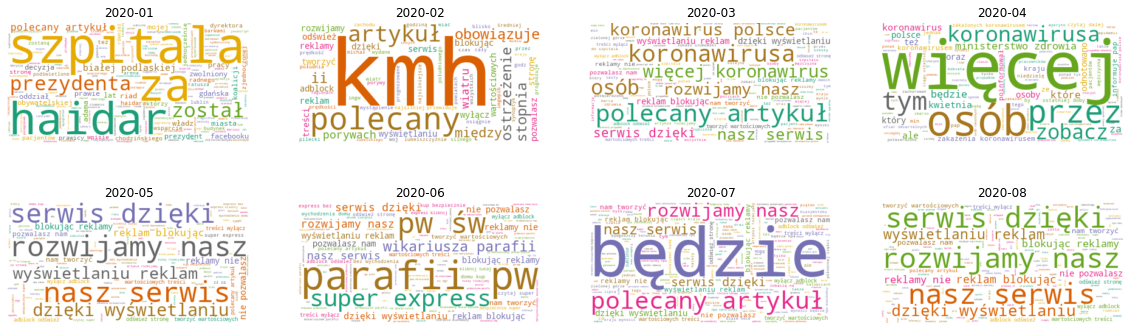

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 16]

full_names = ["2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08"]

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()